# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
## Data file preview to decide on best merging combination
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
## Data file details to understand contents of file
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [4]:
## Data file preview to decide on best merging combination
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
## Data file details to understand contents of file
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [6]:
# Combine the data into a single DataFrame
combined_data = study_results.merge(mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
## Data file details to understand the merged file
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [9]:
## Each "Mouse ID" may have more than 1 data set without being duplicate data points.
combined_data['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
## There is a maximum of 10 possible "Timepoint" time points [0, 5,10 ...45], but not all data sets will include all times
combined_data['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [11]:
## Our data should be uniquely identified by Mouse ID and Timepoint
df = combined_data.groupby('Mouse ID')['Timepoint'].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df

Mouse ID
a203    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a251    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a262    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a275    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a366                [0, 5, 10, 15, 20, 25, 30]
                         ...                  
z435                                [0, 5, 10]
z578    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z581    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z795    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z969    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Name: Timepoint, Length: 249, dtype: object

In [12]:
#List all duplicate data by "Mouse ID" and "Timepoint"
duplicate_data = combined_data[combined_data[['Mouse ID', 'Timepoint']].duplicated(keep=False)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
## Only "Mouse ID" = g989 shows duplicate entries as per above line. To remove all 'g989', all entries for 'g989' need to be identified.
combo2 = (combined_data['Mouse ID'] == 'g989')
combo2

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [14]:
## Select all the 'g989' data
combo3 = combined_data.loc[combo2, 'Mouse ID']

combo3

107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
1195    g989
1380    g989
1592    g989
Name: Mouse ID, dtype: object

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_data = combined_data.drop(combo3.index)
reduced_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [17]:
# Checking the number of mice in the clean DataFrame.
reduced_data["Mouse ID"].nunique()

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_data = reduced_data.set_index(['Drug Regimen'])
regimen_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [19]:
Tumor_Vol_mean = regimen_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Tumor_Vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [20]:
Tumor_Vol_median = regimen_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_Vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [21]:
Tumor_Vol_var = regimen_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Tumor_Vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [22]:
Tumor_Vol_stdev = regimen_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Tumor_Vol_stdev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [23]:
Tumor_Vol_stderr = regimen_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
Tumor_Vol_stderr

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [24]:
stat_summary = pd.DataFrame({
    "Mean Tumor Volume": Tumor_Vol_mean,
    "Median Tumor Volume": Tumor_Vol_median,
    "Tumor Volume Variance": Tumor_Vol_var,
    "Tumor Volume Std. Dev.": Tumor_Vol_stdev,
    "Tumor Volume Std. Err.": Tumor_Vol_stderr,
})
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_summary2 = regimen_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Total_observ = regimen_data.groupby('Drug Regimen')['Timepoint'].size()
Total_observ

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

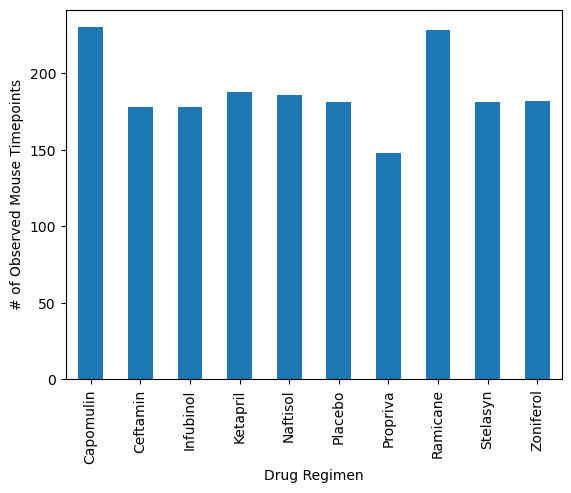

In [27]:
Total_observ.plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints")
plt.show()

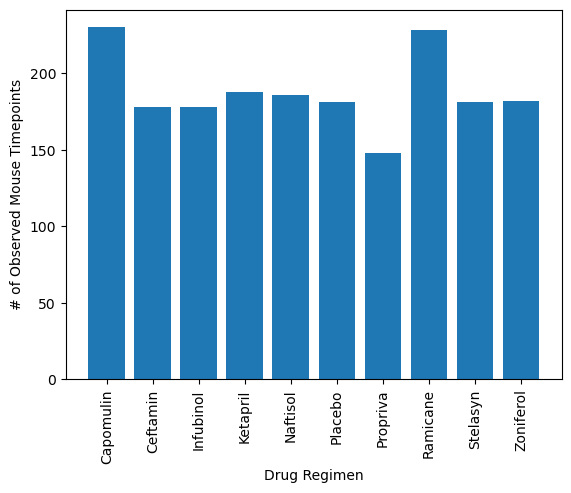

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(Total_observ))
plt.bar(x_axis, Total_observ, color='tab:blue', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Total_observ.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<AxesSubplot:ylabel='count'>

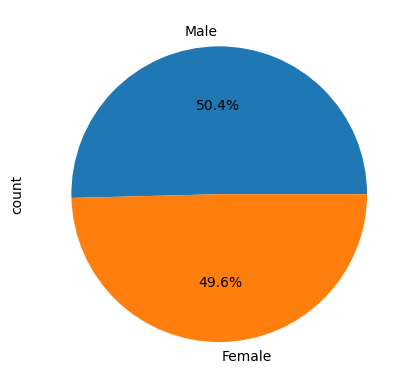

In [29]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender
genderl = regimen_data.groupby('Mouse ID')['Sex'].unique()
gender_count = genderl.explode().value_counts()
gender_count

# Make the pie chart
gender_count.plot.pie(ylabel='count',autopct="%1.1f%%")


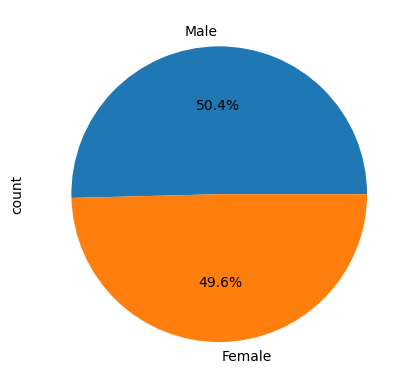

In [30]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
labels = gender_count.index
data = gender_count

plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_select = regimen_data.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],:]
regimen_select

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,j246,0,45.000000,0,Female,21,21
Capomulin,r554,0,45.000000,0,Female,8,17
Capomulin,s185,0,45.000000,0,Female,3,17
Capomulin,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...
Ceftamin,k210,45,68.923185,3,Male,15,28
Ceftamin,x822,45,61.386660,3,Male,3,29
Ceftamin,l733,45,64.299830,1,Female,4,30


In [32]:
# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint_observ = regimen_select.groupby('Mouse ID')['Timepoint'].max()
maxTimepoint_observ

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [33]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_data = regimen_select.merge(maxTimepoint_observ, how="inner", on="Mouse ID")
tumor_data

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Female,9,22,45
1,b128,5,45.651331,0,Female,9,22,45
2,b128,10,43.270852,0,Female,9,22,45
3,b128,15,43.784893,0,Female,9,22,45
4,b128,20,42.731552,0,Female,9,22,45
...,...,...,...,...,...,...,...,...
809,q483,25,52.430066,1,Male,6,26,40
810,q483,30,54.952226,1,Male,6,26,40
811,q483,35,59.253484,1,Male,6,26,40
812,q483,40,64.192341,1,Male,6,26,40


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor_vol = []
Ramicane_tumor_vol = []
Infubinol_tumor_vol = []
Ceftamin_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [35]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.


In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

### Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Timepoint_values = reduced_data.loc[reduced_data['Drug Regimen']=='Capomulin', :]
Timepoint_values.iloc[[1][100], :]


In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
